# 互评作业三：分类、预测与聚类

数据集：Video Game Sales  

该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。  

数据量：11列共1.66W数据。  

基于这个数据集，可进行以下问题的探索：  

1. 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；  

2. 预测每年电子游戏销售额。  

3. 可视化应用：如何完整清晰地展示这个销售故事。   

代码地址：

## 数据说明   
    Rank - Ranking of overall sales  
    Name - The games name  
    Platform - Platform of the games release (i.e. PC,PS4, etc.)  
    Year - Year of the game's release  
    Genre - Genre of the game  
    Publisher - Publisher of the game  
    NA_Sales - Sales in North America (in millions)  
    EU_Sales - Sales in Europe (in millions)  
    JP_Sales - Sales in Japan (in millions)  
    Other_Sales - Sales in the rest of the world (in millions)  
    Global_Sales - Total worldwide sales.  

### 数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import orangecontrib.associate.fpgrowth as oaf
import functools

In [2]:
path = './game/vgsales.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 电子游戏市场分析

In [5]:
listToAnalysis = []
listToStore = []
for i in range(data.iloc[:, 0].size):
    temp = data.iloc[i]['Name']
    listToStore.append(temp)
    temp = data.iloc[i]['Platform']
    listToStore.append(temp)
    temp = data.iloc[i]['Year']
    listToStore.append(temp)
    temp = data.iloc[i]['Genre']
    listToStore.append(temp)
    temp = data.iloc[i]['Publisher']
    listToStore.append(temp)
    temp = data.iloc[i]['NA_Sales']
    if temp < 10:
        temp = 'NA_10'
    elif 10 <= temp < 20:
        temp = 'NA_10_20'
    elif 20 <= temp < 30:
        temp = 'NA_20_30'
    elif 30 <= temp < 40:
        temp = 'NA_30_40'
    else:
        temp = 'NA_40'
    listToStore.append(temp)
    temp = data.iloc[i]['EU_Sales']
    if temp < 10:
        temp = 'EU_10'
    elif 10 <= temp < 15:
        temp = 'EU_10_15'
    elif 15 <= temp < 20:
        temp = 'EU_15_20'
    elif 20 <= temp < 25:
        temp = 'EU_20_25'
    else:
        temp = 'EU_25'
    listToStore.append(temp)
    temp = data.iloc[i]['JP_Sales']
    if temp < 10:
        temp = 'JP_10'
    elif 10 <= temp < 15:
        temp = 'JP_10_15'
    elif 15 <= temp < 20:
        temp = 'JP_15_20'
    elif 20 <= temp < 25:
        temp = 'JP_20_25'
    else:
        temp = 'JP_25'
    listToStore.append(temp)
    temp = data.iloc[i]['Other_Sales']
    if temp < 3:
        temp = 'Other_3'
    elif 3 <= temp < 6:
        temp = 'other_3_6'
    else:
        temp = 'other_6'
    listToStore.append(temp)
    temp = data.iloc[i]['Global_Sales']
    if temp < 10:
        temp = 'Global_10'
    elif 10 <= temp < 20:
        temp = 'Global_10_20'
    elif 20 <= temp < 30:
        temp = 'Global_20_30'
    elif 30 <= temp < 40:
        temp = 'Global_30_40'
    elif 40 <= temp < 50:
        temp = 'Global_40_50'
    elif temp > 50:
        temp = 'Global_50'
    listToStore.append(temp)
    listToAnalysis.append(listToStore.copy())
    listToStore.clear()

In [6]:
strSet = set(functools.reduce(lambda a, b: a + b, listToAnalysis))
strEncode = dict(zip(strSet, range(len(strSet))))
strDecode = dict(zip(strEncode.values(), strEncode.keys()))
listToAnalysis_int = [list(map(lambda item: strEncode[item], row)) for row in listToAnalysis]

In [7]:
itemsets = dict(oaf.frequent_itemsets(listToAnalysis_int , .02)) #支持度

In [234]:
items = []
N = len(data)
for i in itemsets:
    temp = ''
    for j in i:
        temp = temp + str(strDecode[j]) + ' & '
    temp = temp[:-3]
    items.append([temp, round(itemsets[i]/N, 4)])
    temp = temp + ': '+ str(round(itemsets[i]/N, 4))
pd.set_option('display.max_rows',500)
df = pd.DataFrame(items, columns=['频繁项集', '支持度']) 
df = df.sort_values('支持度',ascending=False)
df.index = range(len(df))
df

,频繁项集,支持度
0,JP_10,1.0000
1,EU_10 & JP_10,0.9998
2,Other_3,0.9998
3,EU_10,0.9998
4,Other_3 & JP_10,0.9997
...,...,...
2170,NA_10 & JP_10 & PS4 & Global_10,0.0201
2171,NA_10 & PS4 & Global_10,0.0201
2172,JP_10 & PS4 & Global_10,0.0201
2173,PS4 & Global_10,0.0201


In [9]:
rules = oaf.association_rules(itemsets, .5)   #置信度
rules = list(rules)

In [10]:
# Rules(规则前项，规则后项，支持度，置信度)
returnRules = []
for i in rules:
    temStr = '';
    for j in i[0]:   #处理第一个frozenset
        temStr = temStr+str(strDecode[j])+' & '
    temStr = temStr[:-3]
    temStr = temStr + ' ==> '
    for j in i[1]:
        temStr = temStr+strDecode[j]+' & '
    temStr = temStr[:-3]
    returnRules.append([temStr, round(i[2]/N, 4), round(i[3], 4)])
    temStr = temStr + ';' +'\t'+str(i[2])+ ';' +'\t'+str(i[3])
df = pd.DataFrame(returnRules, columns=['关联规则', '支持度', '置信度']) 
df = df.sort_values('置信度',ascending=False)
df.index = range(len(df))
df

,关联规则,支持度,置信度
0,Other_3 & Global_10 & DS & Action & JP_10 & NA...,0.0206,1.0000
1,Action & PS3 ==> EU_10 & NA_10,0.0229,1.0000
2,Action & PS3 & Global_10 ==> JP_10,0.0228,1.0000
3,Action & PS3 & Global_10 ==> NA_10,0.0228,1.0000
4,Action & PS3 & Global_10 ==> EU_10,0.0228,1.0000
...,...,...,...
14312,Nintendo ==> EU_10 & Other_3 & JP_10 & Global_10,0.0401,0.9474
14313,Nintendo ==> NA_10 & Global_10,0.0401,0.9474
14314,Nintendo ==> Other_3 & JP_10 & Global_10,0.0401,0.9474
14315,Nintendo ==> EU_10 & Global_10,0.0401,0.9474


- 最受欢迎的游戏  
    - 在北美最受欢迎的前五个游戏分别为Wii Sports、Super Mario Bros.、Duck Hunt、Tetris、Mario Kart Wii；  
    - 在欧洲最受欢迎的前五个游戏分别为Wii Sports、Mario Kart Wii、Wii Sports Resort、Nintendogs、Grand Theft Auto V；
    - 在日本最受欢迎的前五个游戏分别为Pokemon Red/Pokemon Blue、Pokemon Gold/Pokemon Silver、Super Mario Bros.、New Super Mario Bros.、Pokemon Diamond/Pokemon Pearl；
    - 在世界其他地区最受欢迎的前五个游戏分别为Grand Theft Auto: San Andreas、Wii Sports、Gran Turismo 4、Grand Theft Auto V、Mario Kart Wii	；
    - 总体来看，最受欢迎的前五个游戏分别为Wii Sports、Super Mario Bros.、Mario Kart Wii、Wii Sports Resort、Pokemon Red/Pokemon Blue。

- 最受欢迎的游戏类型
    - 在北美最受欢迎的游戏类型为Action, Sports其次，Shooter第三；
    - 在欧洲最受欢迎的游戏类型为Action, Sports其次，Shooter第三；
    - 在日本最受欢迎的游戏类型为Role-Playing，Action其次，Sports第三；
    - 在其他地区最受欢迎的游戏类型为Action, Sports其次，Shooter第三；
    - 世界范围内最受欢迎的游戏类型为Action, Sports其次，Shooter第三；
  
- 销量最高的发布平台
    - 在北美销量最高的平台为X360，PS2其次，Wii第三；
    - 在欧洲销量最高的平台为PS3，PS2其次，X360第三；
    - 在日本销量最高的平台为DS，PS其次，PS2第三；
    - 在其他地区销量最高的平台为PS2，PS3其次，X360第三；
    - 在世界范围内销量最高的平台为PS2，X360其次，PS3第三。

- 最受欢迎的发行人
    - 在北美最受欢迎的前五个发行人分别为Nintendo、Electronic Arts、Activision、Sony Computer Entertainment、Ubisoft；
    - 在欧洲最受欢迎的前五个发行人分别为Nintendo、Electronic Arts、Activision、Sony Computer Entertainment、Ubisoft；
    - 在日本最受欢迎的前五个发行人分别为Nintendo、Namco Bandai Games、Konami Digital Entertainment、Sony Computer Entertainment、Capcom；
    - 在其他地区最受欢迎的前五个发行人分别为Electronic Arts、Nintendo、Sony Computer Entertainment、Activision、Take-Two Interactive；
    - 世界范围内最受欢迎的前五个发行人分别为Nintendo、Electronic Arts、Activision、Sony Computer Entertainment、Ubisoft。

In [11]:
# Name
data.sort_values('NA_Sales',ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
8808,8810,Jikkyou Powerful Pro Yakyuu 2012,PSP,2012.0,Action,Konami Digital Entertainment,0.00,0.00,0.15,0.00,0.15
8799,8801,Theatrhythm Dragon Quest,3DS,2015.0,Misc,Square Enix,0.00,0.00,0.15,0.00,0.15
8795,8797,Countdown: The Game,DS,2009.0,Puzzle,Mindscape,0.00,0.14,0.00,0.01,0.15
13576,13578,Kanuchi: Shiroki Tsubasa no Shou,PS2,2008.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04


In [12]:
# Genre
Genre_list = data['Genre'].value_counts().index
sales_list = []
for i in Genre_list:
    temp_data = data[data['Genre'] == i]
    sales_list.append([i, temp_data['NA_Sales'].sum(), temp_data['EU_Sales'].sum(), temp_data['JP_Sales'].sum(), temp_data['Other_Sales'].sum(), temp_data['Global_Sales'].sum()])
Genre_df = pd.DataFrame(sales_list, columns=['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

In [13]:
Genre_df.sort_values('Global_Sales', ascending=False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Sports,683.35,376.85,135.37,134.97,1330.93
4,Shooter,582.60,313.27,38.28,102.69,1037.37
3,Role-Playing,327.28,188.06,352.31,59.61,927.37
7,Platform,447.05,201.63,130.77,51.59,831.37
2,Misc,410.24,215.98,107.76,75.32,809.96
6,Racing,359.42,238.39,56.69,77.27,732.04
9,Fighting,223.59,101.32,87.35,36.68,448.91
8,Simulation,183.31,113.38,63.70,31.52,392.20
11,Puzzle,123.78,50.78,57.31,12.55,244.95


In [87]:
# Platform
platform_list = data['Platform'].value_counts().index
sales_list = []
for i in platform_list:
    temp_data = data[data['Platform'] == i]
    sales_list.append([i, temp_data['NA_Sales'].sum(), temp_data['EU_Sales'].sum(), temp_data['JP_Sales'].sum(), temp_data['Other_Sales'].sum(), temp_data['Global_Sales'].sum()])
platform_df = pd.DataFrame(sales_list, columns=['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

In [88]:
platform_df.sort_values('Global_Sales',ascending=False)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,PS2,583.84,339.29,139.20,193.44,1255.64
4,X360,601.05,280.58,12.43,85.54,979.96
2,PS3,392.26,343.71,79.99,141.93,957.84
3,Wii,507.71,268.38,69.35,80.61,926.71
0,DS,390.71,194.65,175.57,60.53,822.49
6,PS,336.51,213.60,139.82,40.91,730.66
9,GBA,187.54,75.25,47.33,7.73,318.50
5,PSP,108.99,68.25,76.79,42.19,296.28
13,PS4,96.80,123.70,14.30,43.36,278.10
7,PC,93.28,139.68,0.17,24.86,258.82


In [16]:
# Publisher
Publisher_list = data['Publisher'].value_counts().index
sales_list = []
for i in Publisher_list:
    temp_data = data[data['Publisher'] == i]
    sales_list.append([i, temp_data['NA_Sales'].sum(), temp_data['EU_Sales'].sum(), temp_data['JP_Sales'].sum(), temp_data['Other_Sales'].sum(), temp_data['Global_Sales'].sum()])
Publisher_df = pd.DataFrame(sales_list, columns=['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

In [17]:
Publisher_df.sort_values('Global_Sales', ascending=False)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6,Nintendo,816.87,418.74,455.42,95.33,1786.56
0,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
1,Activision,429.70,215.53,6.54,75.34,727.46
7,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
3,Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...
500,Interchannel-Holon,0.00,0.00,0.01,0.00,0.01
522,Piacci,0.00,0.00,0.01,0.00,0.01
518,Stainless Games,0.01,0.01,0.00,0.00,0.01
510,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01


## 每年电子游戏销售额预测

In [177]:
# Year
Year_list = data['Year'].value_counts().index
sales_list = []
for i in Year_list:
    temp_data = data[data['Year'] == i]
    sales_list.append([i, temp_data['NA_Sales'].sum(), temp_data['EU_Sales'].sum(), temp_data['JP_Sales'].sum(), temp_data['Other_Sales'].sum(), temp_data['Global_Sales'].sum()])
Year_df = pd.DataFrame(sales_list, columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales'])

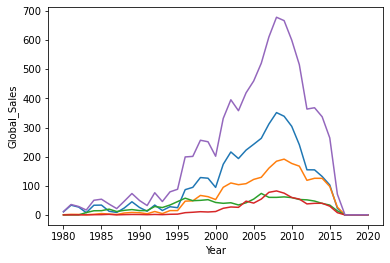

In [237]:
sns.lineplot(x='Year', y='NA_Sales',data=Year_df)
sns.lineplot(x='Year', y='EU_Sales',data=Year_df)
sns.lineplot(x='Year', y='JP_Sales',data=Year_df)
sns.lineplot(x='Year', y='Other_Sales',data=Year_df)
sns.lineplot(x='Year', y='Global_Sales',data=Year_df)
plt.show()

In [216]:
new_data = pd.DataFrame(data.groupby('Year').agg({'Global_Sales':np.sum}))
year = data.pivot_table(index='Year', values=['JP_Sales','EU_Sales', 'NA_Sales','Global_Sales'], aggfunc=np.sum,)
year = year.drop(year.index[38])

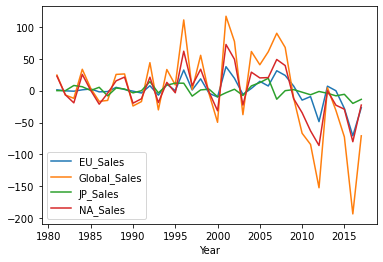

In [233]:
from statsmodels.tsa.stattools import adfuller as ADF
diff_data=year.diff().dropna()   #去除NA值
diff_data.plot()

<ipython-input-220-80fa02e82e16>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(new_data,lags=15).show()
<ipython-input-220-80fa02e82e16>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(new_data,lags=15).show()


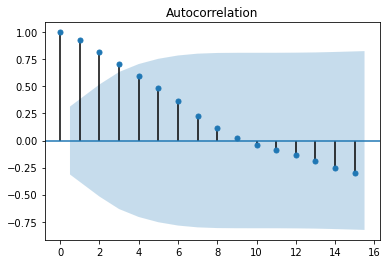

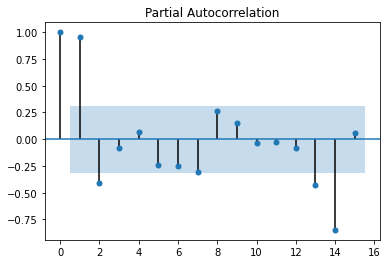

In [220]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
plot_acf(new_data,lags=15).show()
plot_pacf(new_data,lags=15).show()


C:\Users\lenovo\anaconda3\envs\py3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


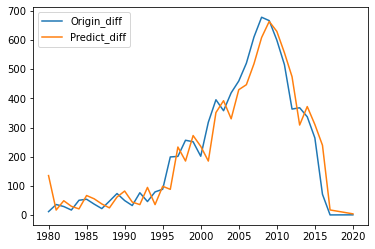

In [232]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(new_data,order=(1,1)).fit()
plt.plot(new_data,label='Origin_diff')
plt.plot(model.fittedvalues,label='Predict_diff')
plt.legend(loc='best')
plt.show()

### 可视化     
- 各游戏类型销量直方图

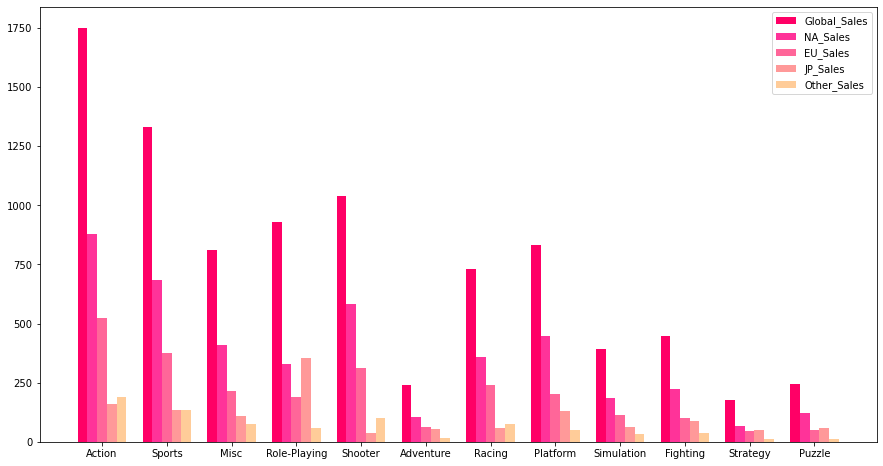

In [56]:
# 直方图
# 各游戏类型销量
plt.figure(figsize=(15, 8))

x = list(range(len(Genre_list)))
width = 0.15
Sales_item = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
color = ['#ff0066', '#ff3399', '#ff6699', '#ff9999', '#ffcc99']
for i in range(len(Sales_item)):
    if i == 2:
        plt.bar(x, Genre_df[Sales_item[i]], color=color[i], width=width, label=Sales_item[i], tick_label=Genre_list)
    else:
        plt.bar(x, Genre_df[Sales_item[i]], color=color[i], width=width, label=Sales_item[i])
    for j in range(len(x)):
        x[j] = x[j] + width
plt.legend()
plt.show()

- 总销量排名前十的平台中，各平台销量占比

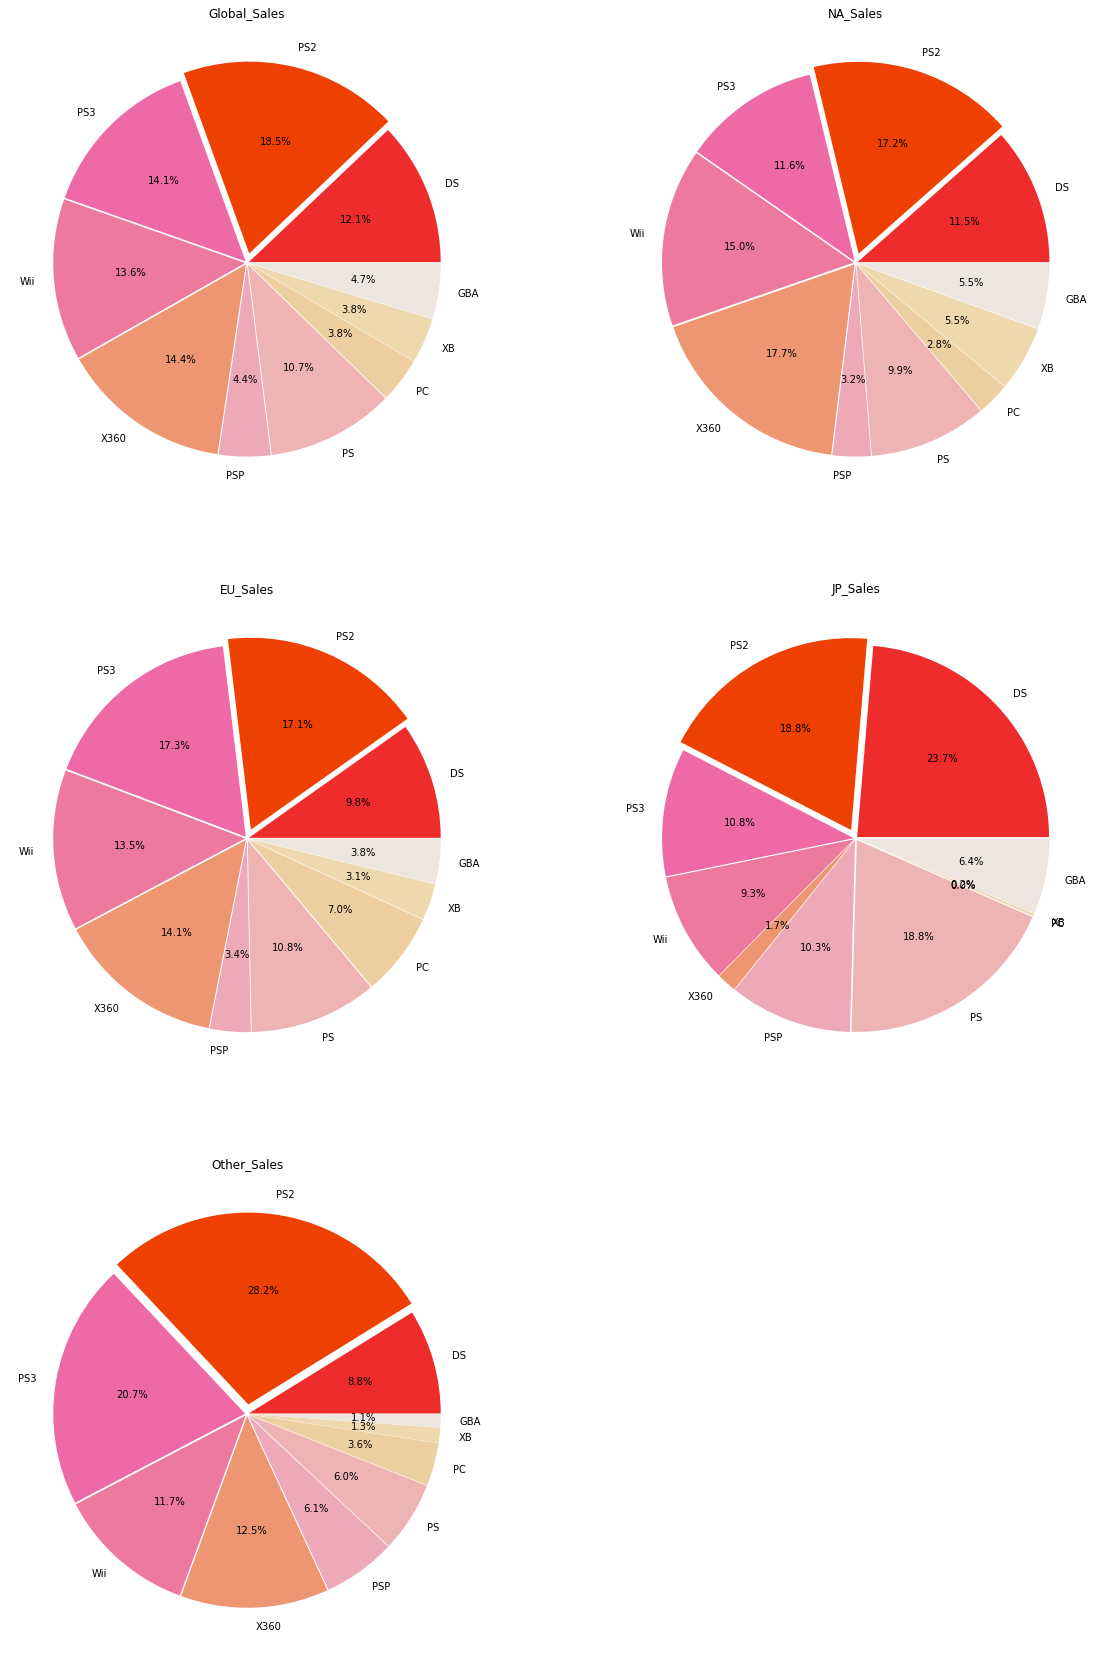

In [175]:
# 饼图
explode = [0.01, 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
colors = ['#EE2C2C', '#EE4000', '#EE6AA7', '#EE799F', '#EE9572', '#EEA9B8', '#EEB4B4', '#EECFA1', '#EED8AE', '#EEE5DE']
plt.figure(figsize=(20, 30))
plt.subplot(3, 2, 1)
plt.title('Global_Sales')
plt.pie(platform_df.loc[:9, 'Global_Sales'], explode=explode, labels=platform_list[:10], autopct='%1.1f%%', colors=colors)
plt.subplot(3, 2, 2)
plt.title('NA_Sales')
plt.pie(platform_df.loc[:9, 'NA_Sales'], explode=explode, labels=platform_list[:10], autopct='%1.1f%%', colors=colors)
plt.subplot(3, 2, 3)
plt.title('EU_Sales')
plt.pie(platform_df.loc[:9, 'EU_Sales'], explode=explode, labels=platform_list[:10], autopct='%1.1f%%', colors=colors)
plt.subplot(3, 2, 4)
plt.title('JP_Sales')
plt.pie(platform_df.loc[:9, 'JP_Sales'], explode=explode, labels=platform_list[:10], autopct='%1.1f%%', colors=colors)
plt.subplot(3, 2, 5)
plt.title('Other_Sales')
plt.pie(platform_df.loc[:9, 'Other_Sales'], explode=explode, labels=platform_list[:10], autopct='%1.1f%%', colors=colors)
plt.show()

- 发行人与各类型游戏的销量的关系

In [176]:
top_p = ['Nintendo','Electronic Arts','Activision','Sony Computer Entertainment','Ubisoft']
top_p_df = data[data['Publisher'].isin(top_p)]
top_p_df
top5_genre = pd.pivot_table(data=top_p_df,index=['Genre','Publisher'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],aggfunc=np.sum)
order = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'] #调整列的顺序
new_top5_genre = top5_genre[order]
new_top5_genre
#new_top5_genre.sort_values(by=['Global_Sales'],ascending=False).groupby(by=['Genre','Publisher'])

NA_Sales  EU_Sales  JP_Sales  \
Genre        Publisher                                                   
Action       Activision                      87.29     40.02      1.08   
             Electronic Arts                 54.25     44.07      2.49   
             Nintendo                        63.49     29.02     29.24   
             Sony Computer Entertainment     46.09     29.84      3.96   
             Ubisoft                         69.38     54.10      2.11   
Adventure    Activision                       4.04      0.87      0.10   
             Electronic Arts                  2.57      1.65      0.08   
             Nintendo                        17.72      7.66      9.01   
             Sony Computer Entertainment      4.57      4.39      2.73   
             Ubisoft                         11.41      8.08      0.28   
Fighting     Activision                       1.94      0.76      0.00   
             Electronic Arts                 19.88      8.75      0.03   
             Nintendo                        27.10      8.64     14.94   
             Sony Computer Entertainment     10.30      8.53      7.24   
             Ubisoft                          3.89      1.95      0.58   
Misc         Activision                      48.68     17.63      0.05   
             Electronic Arts                 14.92      7.30      0.01   
             Nintendo                        61.98     51.62     55.25   
             Sony Computer Entertainment     25.47     33.81      5.58   
             Ubisoft                         58.49     29.65      0.29   
Platform     Activision                      23.45      7.85      0.07   
             Electronic Arts                  3.16      2.55      0.05   
             Nintendo                       220.14     85.21    102.36   
             Sony Computer Entertainment     53.04     32.87      7.57   
             Ubisoft                         10.05      9.03      0.04   
Puzzle       Activision                       0.78      0.11      0.15   
             Electronic Arts                  2.66      1.43      0.00   
             Nintendo                        55.74     26.42     37.09   
             Sony Computer Entertainment      0.64      0.78      1.97   
             Ubisoft                          2.63      3.05      0.03   
Racing       Activision                      12.18      3.66      0.04   
             Electronic Arts                 75.52     51.20      1.20   
             Nintendo                        73.55     39.75     29.22   
             Sony Computer Entertainment     42.43     35.42     13.89   
             Ubisoft                          7.73      6.27      0.10   
Role-Playing Activision                      23.58     18.40      0.26   
             Electronic Arts                 17.82     11.39      2.66   
             Nintendo                       105.63     63.92    102.24   
             Sony Computer Entertainment     15.90      9.21     16.08   
             Ubisoft                          9.06      4.05      2.15   
Shooter      Activision                     161.39     98.59      4.64   
             Electronic Arts                 81.15     56.03      2.93   
             Nintendo                        51.39      9.85      6.07   
             Sony Computer Entertainment     31.22     16.70      2.80   
             Ubisoft                         35.01     24.04      0.96   
Simulation   Activision                       5.33      2.14      0.02   
             Electronic Arts                 44.03     35.83      0.88   
             Nintendo                        29.70     26.05     23.67   
             Sony Computer Entertainment      3.13      2.40      2.38   
             Ubisoft                         28.01     11.70      0.79   
Sports       Activision                      52.88     17.56      0.13   
             Electronic Arts                270.27    146.97      3.27   
             Nintendo                        9